# Tutorial: K562 HCT116 SP1 single-cell callingcards data. 

In this data, we test transcription factor SP1 bindings in celline K562 and HCT116 by single-cell(sc) calling cards techenology. The data is from [Moudgil et al., Cell. (2020)](https://doi.org/10.1016/j.cell.2020.06.037) and could be download from [GEO](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE148448).

In this tutorial, we will call peaks with backgound, make annotation, compare peaks with Chip-seq reference data and do differential peak analysis. 

In [1]:
import pycallingcards as cc
import numpy as np
import pandas as pd
import scanpy as sc

We start by reading ccf data. In this data, one row is one insertion and columns indecate the chromosome, start point and end point, read number, direction and cell borcode of each insertion. For example, the first row means one insertion is in Chromosome 1 and starts from 30116 to 30120. The read number is 12 with direction from 5' to 3'. The barcode of the cell is CCCAATCCATCGGTTA-1. Note that the barcodes of the cell would also be consistent with scRNA-seq data.

You could use ```cc.rd.read_ccf(filename)``` to read your own ccf data.

In [2]:
# read experiement data
HCT116_SP1 = cc.datasets.SP1_K562HCT116_data(data="HCT116_SP1_ccf")
HCT116_SP1

,Chr,Start,End,Reads,Direction,Barcodes
0,chr1,30116,30120,5,-,CCCAATCCATCGGTTA-1
1,chr1,34568,34572,3,-,CCTTCGAAGGGCTTCC-1
2,chr1,36736,36740,29,+,ACGAGCCGTATAGGTA-1
3,chr1,42447,42451,3,-,CTCTACGTCGGAGCAA-1
4,chr1,89697,89701,119,-,AGCTCTCGTTTGTTTC-1
...,...,...,...,...,...,...
77205,chrY,25518788,25518792,2,+,TGGGCGTTCGAACGGA-1
77206,chrY,56987633,56987637,13,+,CAGTCCTAGGCACATG-1
77207,chrY,57080855,57080859,17,+,CGGAGCTCATCGACGC-1
77208,chrY,57080855,57080859,7,+,GTAACGTAGTTACGGG-1


In [3]:
# read backgound data 
HCT116_brd4 = cc.datasets.SP1_K562HCT116_data(data="HCT116_brd4_ccf")
HCT116_brd4 

,Chr,Start,End,Reads,Direction,Barcodes
0,chr1,89697,89701,14,+,TCTGAGACAATGGTCT-1
1,chr1,89697,89701,8,+,CAGCGACCAAATACAG-1
2,chr1,203932,203936,99,+,TTCTCCTTCTACTTAC-1
3,chr1,204063,204067,5,-,TGTTCCGGTGTAAGTA-1
4,chr1,204063,204067,7,-,CAAGATCTCGACCAGC-1
...,...,...,...,...,...,...
37769,chrY,18037315,18037319,9,-,GCAGTTAAGATCTGAA-1
37770,chrY,24036504,24036508,168,+,GCAGTTAAGATCTGAA-1
37771,chrY,24036504,24036508,508,+,CATATGGCAGCCAGAA-1
37772,chrY,25633622,25633626,13,-,GCAGTTAAGATCTGAA-1


Because insertions are discrete, we now call peaks to deduce potential binding sites. Three different methods (*CCcaller,ccf_tools,Blockify*) are available along with there different species (*hg38,mm10,yeast*). 

 
In this setting, we use ***ccf_tools*** in *human*('hg38') data. *window_size* is the most important parameter for *ccf_tools*, it is highly related to the length of a peak. 2000-3500 is a good fit for *window_size*. *step_size* is another important paramenter and it controls how careful we are looking into the chromosomes. 500-1000 is good for *step_size*. *pvalue_cutoffTTAA* is the pvalue cutoff for TTAA data and  *pvalue_cutoffbg* is pvalue cutoff for the background ccf data. Normally, the setting for *pvalue_cutoffbg* is higher than *pvalue_cutoffTTAA*, but both of them should not exceed 0.1. 

In [4]:
peak_data_HCT116 = cc.pp.callpeaks(HCT116_SP1, HCT116_brd4, method = "ccf_tools", reference = "hg38",  window_size = 2000, step_size = 500,
                  pvalue_cutoffTTAA = 0.001, pvalue_cutoffbg = 0.1, lam_win_size = None,  pseudocounts = 0.1, record = True, save = "peak.bed")
peak_data_HCT116

For the ccf_tools method with background, [expdata, background, reference, pvalue_cutoffbg, pvalue_cutoffTTAA, lam_win_size, window_size, step_size, extend, pseudocounts, test_method, min_insertions, record] would be utilized.


100%|██████████| 25/25 [00:56<00:00,  2.25s/it]


,Chr,Start,End,Center,Experiment Insertions,Background insertions,Reference Insertions,pvalue Reference,pvalue Background,Fraction Experiment,TPH Experiment,Fraction background,TPH background,TPH background subtracted
0,chr1,906689,907160,906957.0,5,0,3,3.099334e-09,1.546531e-04,0.000065,6475.845098,0.000000,0.000000,6475.845098
1,chr1,999921,1000324,1000121.0,20,0,1,0.000000e+00,0.000000e+00,0.000259,25903.380391,0.000000,0.000000,25903.380391
2,chr1,1156947,1157863,1157660.0,11,0,2,0.000000e+00,1.274899e-09,0.000142,14246.859215,0.000000,0.000000,14246.859215
3,chr1,1692740,1693542,1693339.0,6,0,3,5.135270e-11,1.546531e-04,0.000078,7771.014117,0.000000,0.000000,7771.014117
4,chr1,1744492,1746808,1746605.0,11,0,7,0.000000e+00,1.274899e-09,0.000142,14246.859215,0.000000,0.000000,14246.859215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3009,chrY,1245503,1247177,1245703.0,5,0,7,1.652897e-09,4.678840e-03,0.000065,6475.845098,0.000000,0.000000,6475.845098
3010,chrY,1280372,1281989,1281786.0,5,0,3,1.426995e-09,4.678840e-03,0.000065,6475.845098,0.000000,0.000000,6475.845098
3011,chrY,1586317,1587733,1587530.0,7,0,8,3.370637e-13,1.546531e-04,0.000091,9066.183137,0.000000,0.000000,9066.183137
3012,chrY,2391936,2392440,2392237.0,6,1,2,1.985434e-11,9.958372e-02,0.000078,7771.014117,0.000026,2647.323556,5123.690561


In order to choose suitable method and parameters for peak calling, please take a look at genome areas. We stongly advise to adjust the parameters for ```cc.pp.callpeaks()``` to call better peaks.

In this plot, the colored ones are the experiment ccf data and the gray ones are the background data. The first part is insertions and their read counts. One dot is an insertion and the height is log(reads+1). The second part is the distribution of insertions. The third part represents reference genes and peaks. 


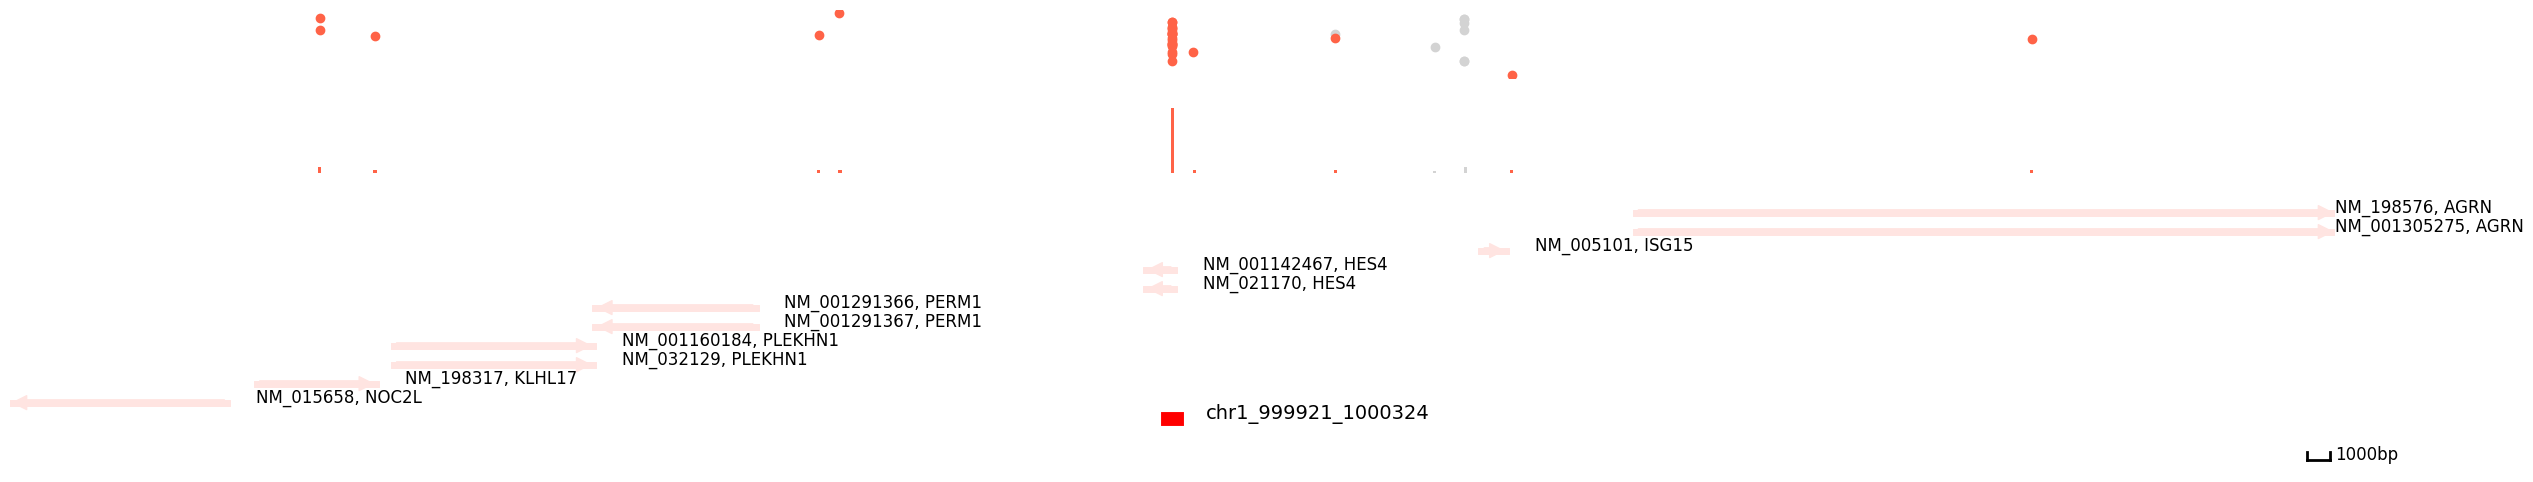

In [5]:
cc.pl.draw_area("chr1",999921,1000324,50000,peak_data_HCT116, HCT116_SP1, "hg38", HCT116_brd4,
                figsize = (30,6),peak_line = 1,save = False,plotsize = [1,1,4], example_length = 1000)

We advise to look at the whole chromosome and see the distribution of peaks to make sure everything is going right.

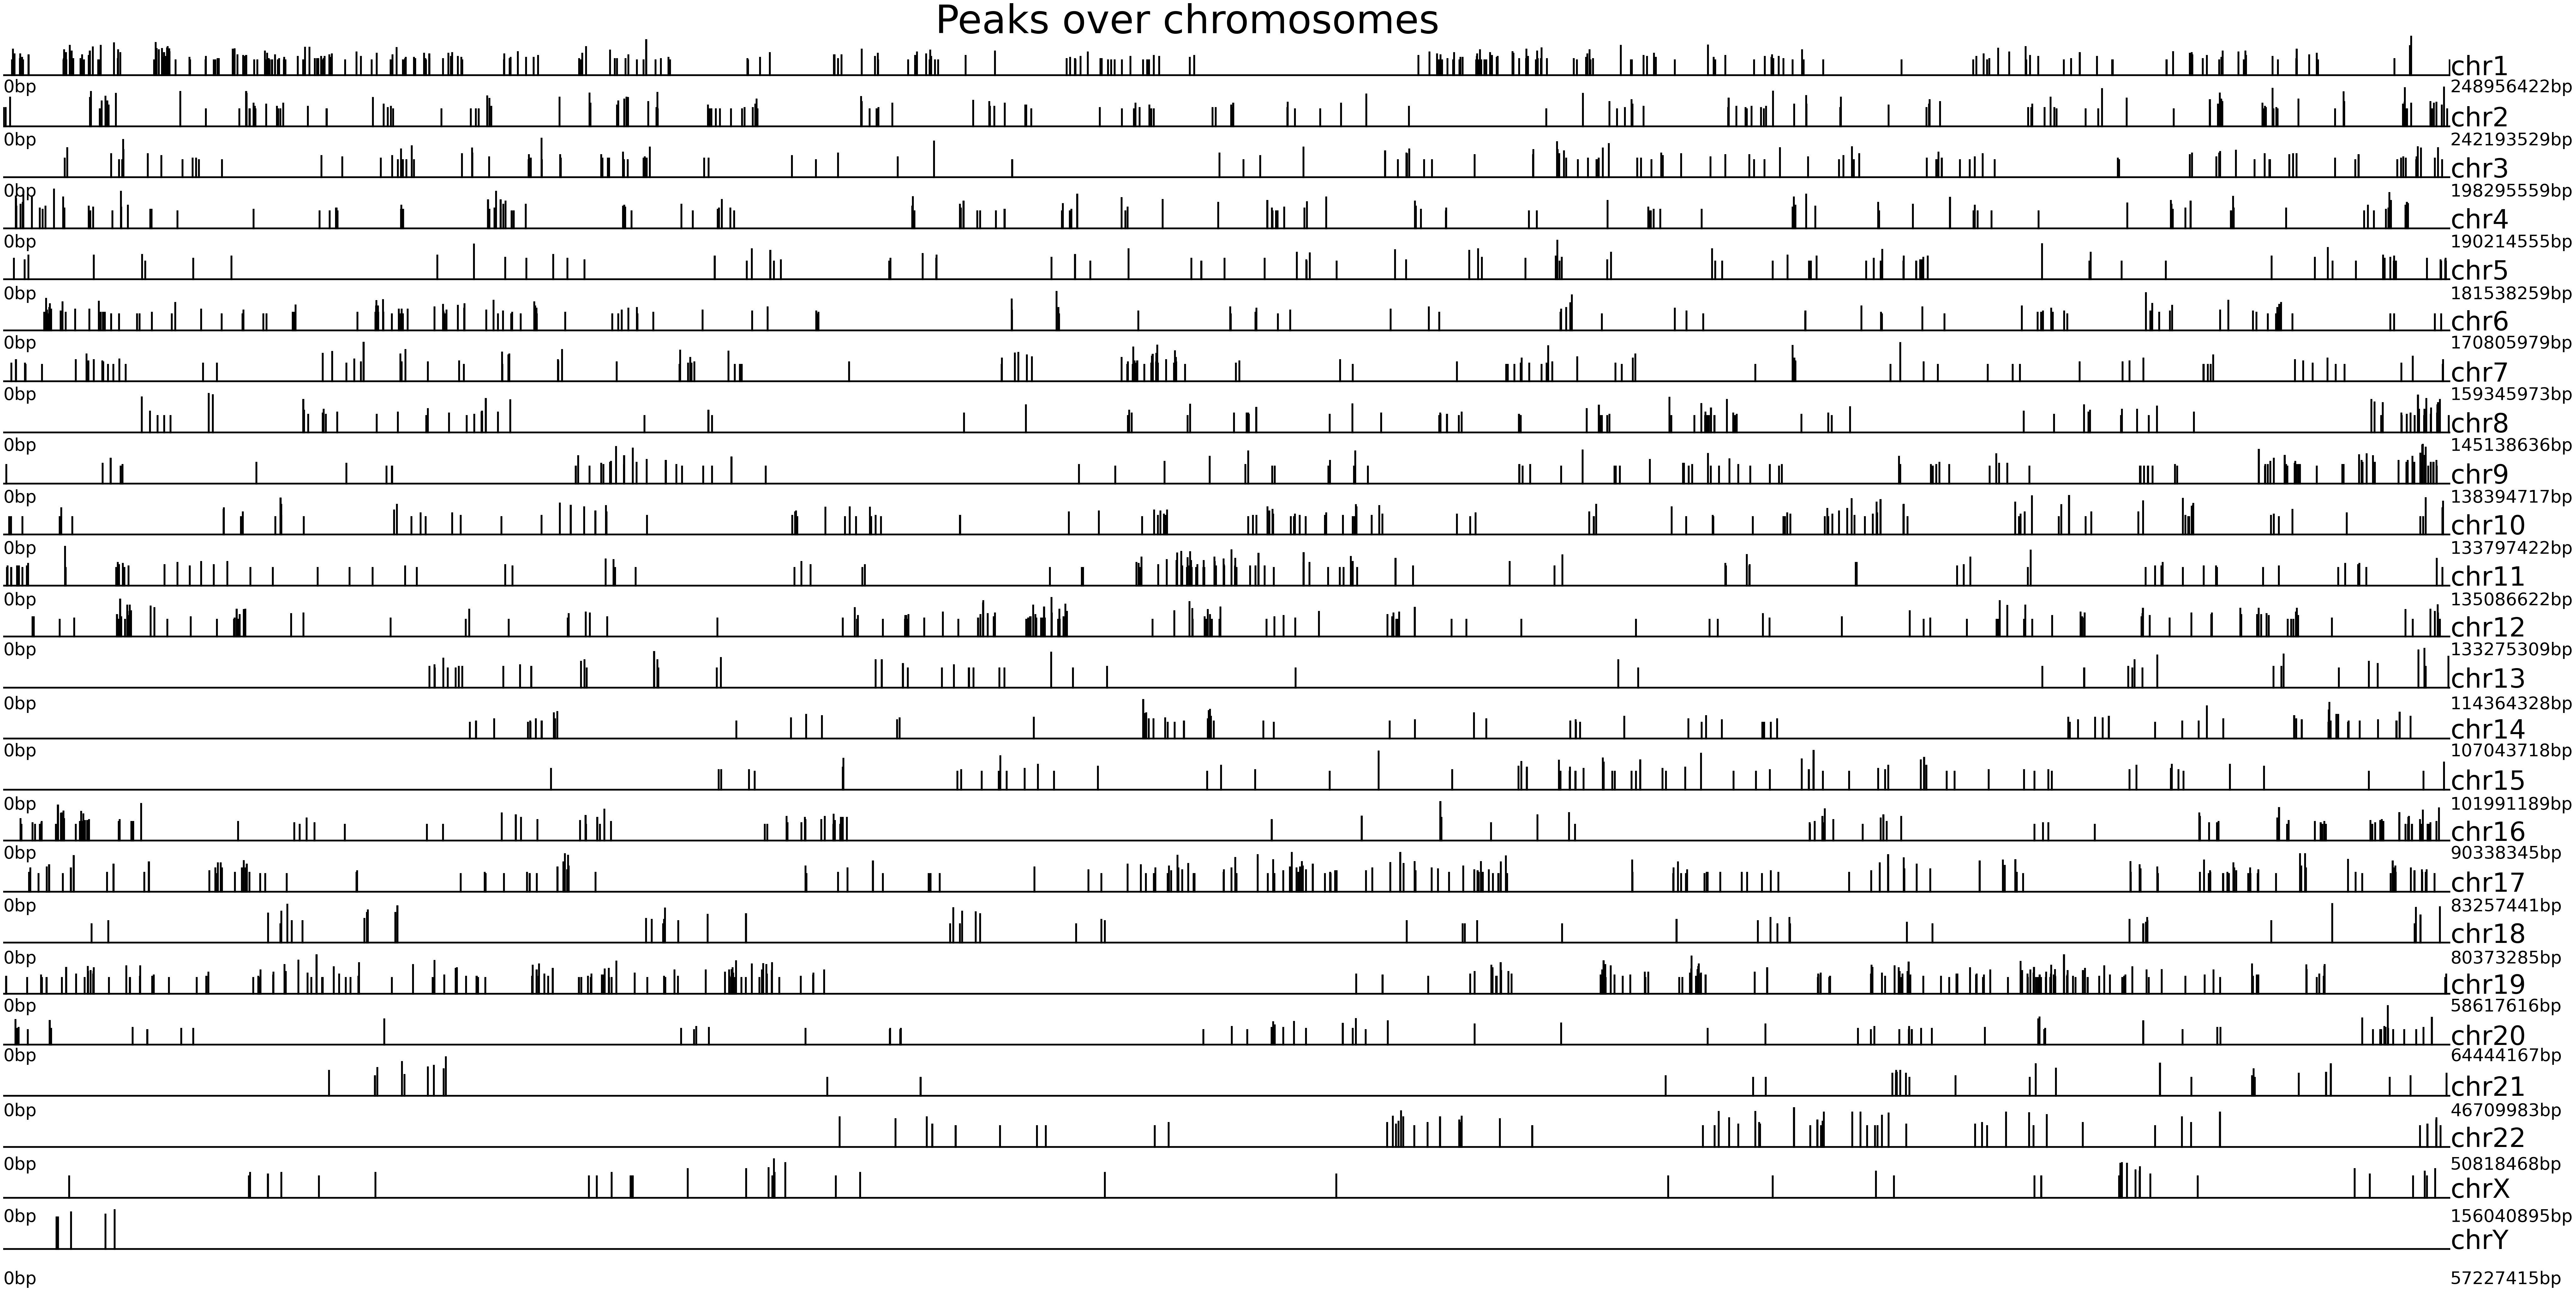

In [6]:
cc.pl.whole_peaks(peak_data_HCT116, reference = "hg38")

We then check the peak with reference Chip-seq data of SP1 in HCT116 from [ENCSR000BSF](https://www.encodeproject.org/experiments/ENCSR000BSF/) (use the bigWig file [ENCFF587ZMX](https://www.encodeproject.org/files/ENCFF587ZMX/) generated by it).

Download the data if needed by:

``` Python
    !wget https://www.encodeproject.org/files/ENCFF587ZMX/@@download/ENCFF587ZMX.bigWig
```


We first calculate the signal of the Chip-seq signal around the peak.

In [7]:
mtx_HCT116 = cc.pl.calculate_signal(peak_data_HCT116, 
                                    chipseq_signal = "ENCFF587ZMX.bigWig")

100%|██████████| 3014/3014 [00:28<00:00, 104.71it/s]


Visualized by the plotting the siganl values.

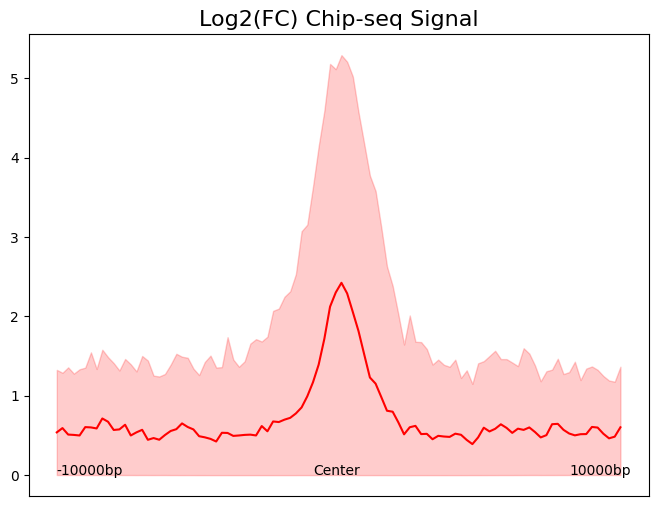

In [8]:
cc.pl.signal_plot(mtx_HCT116, alpha = 0.05)

Visualized by the plotting the signal heatmap plot.

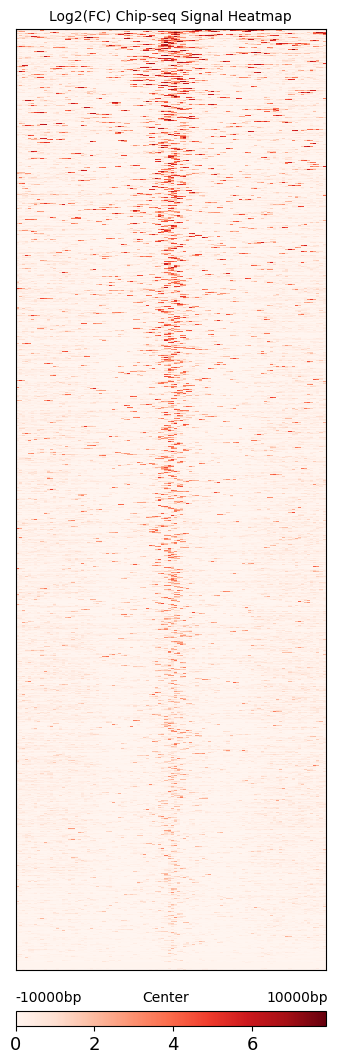

In [9]:
cc.pl.signal_heatmap(mtx_HCT116,pad = 0.035)

Do the exact same thing for K562 SP1 data.

In [10]:
# read experiment data
K562_SP1 = cc.datasets.SP1_K562HCT116_data(data="K562_SP1_ccf")
K562_SP1

,Chr,Start,End,Reads,Direction,Barcodes
0,chr1,16529,16533,163,-,GCTCCTAAGTACGTTC-1
1,chr1,29884,29888,10,+,CTCACACCAGACGCTC-1
2,chr1,29884,29888,155,+,TGGCCAGCACCCATTC-1
3,chr1,29884,29888,285,+,GTGGGTCCACGGCCAT-1
4,chr1,29884,29888,7,+,CGTCTACTCAACACGT-1
...,...,...,...,...,...,...
327460,chrY,57061562,57061566,6,+,CTCATTATCATCATTC-1
327461,chrY,57061562,57061566,67,+,TGCGTGGCATTAGGCT-1
327462,chrY,57145084,57145088,2,-,ACATACGTCGCGCCAA-1
327463,chrY,57148630,57148634,2,-,TATGCCCGTACAGTTC-1


In [11]:
# read background data
K562_brd4 =cc.datasets.SP1_K562HCT116_data(data="K562_brd4_ccf")
K562_brd4 

,Chr,Start,End,Reads,Direction,Barcodes
0,chr1,30238,30242,3,+,TTTACTGCATAAAGGT-1
1,chr1,30355,30359,2,-,ATCACGAAGAGTAATC-1
2,chr1,30355,30359,70,+,TTGAACGCAAATCCGT-1
3,chr1,31101,31105,2,+,CCTCAGTCATCAGTAC-1
4,chr1,32116,32120,5,+,CTAGTGAAGACAAAGG-1
...,...,...,...,...,...,...
107380,chrY,57080210,57080214,9,-,AAGGAGCCAGTATAAG-1
107381,chrY,57087785,57087789,24,-,CGAGCCAGTCTCTCTG-1
107382,chrY,57144853,57144857,5,+,GAAGCAGTCCCATTTA-1
107383,chrY,57183772,57183776,2,-,TCTTTCCTCTTGCCGT-1


In [12]:
peak_data_K562 = cc.pp.callpeaks(K562_SP1, K562_brd4, method = "ccf_tools", reference = "hg38", window_size = 2000, step_size = 500,
                  pvalue_cutoffTTAA = 0.0001,  pvalue_cutoffbg = 0.1, lam_win_size = None,  pseudocounts = 0.1, record = True, save = "peak_k562.bed")
peak_data_K562

For the ccf_tools method with background, [expdata, background, reference, pvalue_cutoffbg, pvalue_cutoffTTAA, lam_win_size, window_size, step_size, extend, pseudocounts, test_method, min_insertions, record] would be utilized.


100%|██████████| 24/24 [01:49<00:00,  4.55s/it]


,Chr,Start,End,Center,Experiment Insertions,Background insertions,Reference Insertions,pvalue Reference,pvalue Background,Fraction Experiment,TPH Experiment,Fraction background,TPH background,TPH background subtracted
0,chr1,29684,30087,29884.0,6,0,1,8.878753e-11,1.546531e-04,0.000018,1832.256882,0.000000,0.000000,1832.256882
1,chr1,36239,38107,37578.0,24,2,15,0.000000e+00,1.486029e-03,0.000073,7329.027530,0.000019,1862.457513,5466.570017
2,chr1,198893,201208,200869.0,28,2,11,0.000000e+00,6.927041e-05,0.000086,8550.532118,0.000019,1862.457513,6688.074605
3,chr1,203351,207161,205004.0,92,13,22,0.000000e+00,4.337485e-05,0.000281,28094.605530,0.000121,12105.973832,15988.631698
4,chr1,265549,266336,265749.0,5,0,3,3.731359e-08,4.678840e-03,0.000015,1526.880735,0.000000,0.000000,1526.880735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9871,chrY,15158250,15158653,15158450.0,11,0,1,0.000000e+00,1.546531e-04,0.000034,3359.137618,0.000000,0.000000,3359.137618
9872,chrY,16985442,16985845,16985642.0,5,0,2,1.806731e-09,4.678840e-03,0.000015,1526.880735,0.000000,0.000000,1526.880735
9873,chrY,19753311,19753714,19753511.0,33,0,1,0.000000e+00,2.269296e-13,0.000101,10077.412853,0.000000,0.000000,10077.412853
9874,chrY,21011133,21011828,21011333.0,5,0,4,2.510448e-09,4.678840e-03,0.000015,1526.880735,0.000000,0.000000,1526.880735


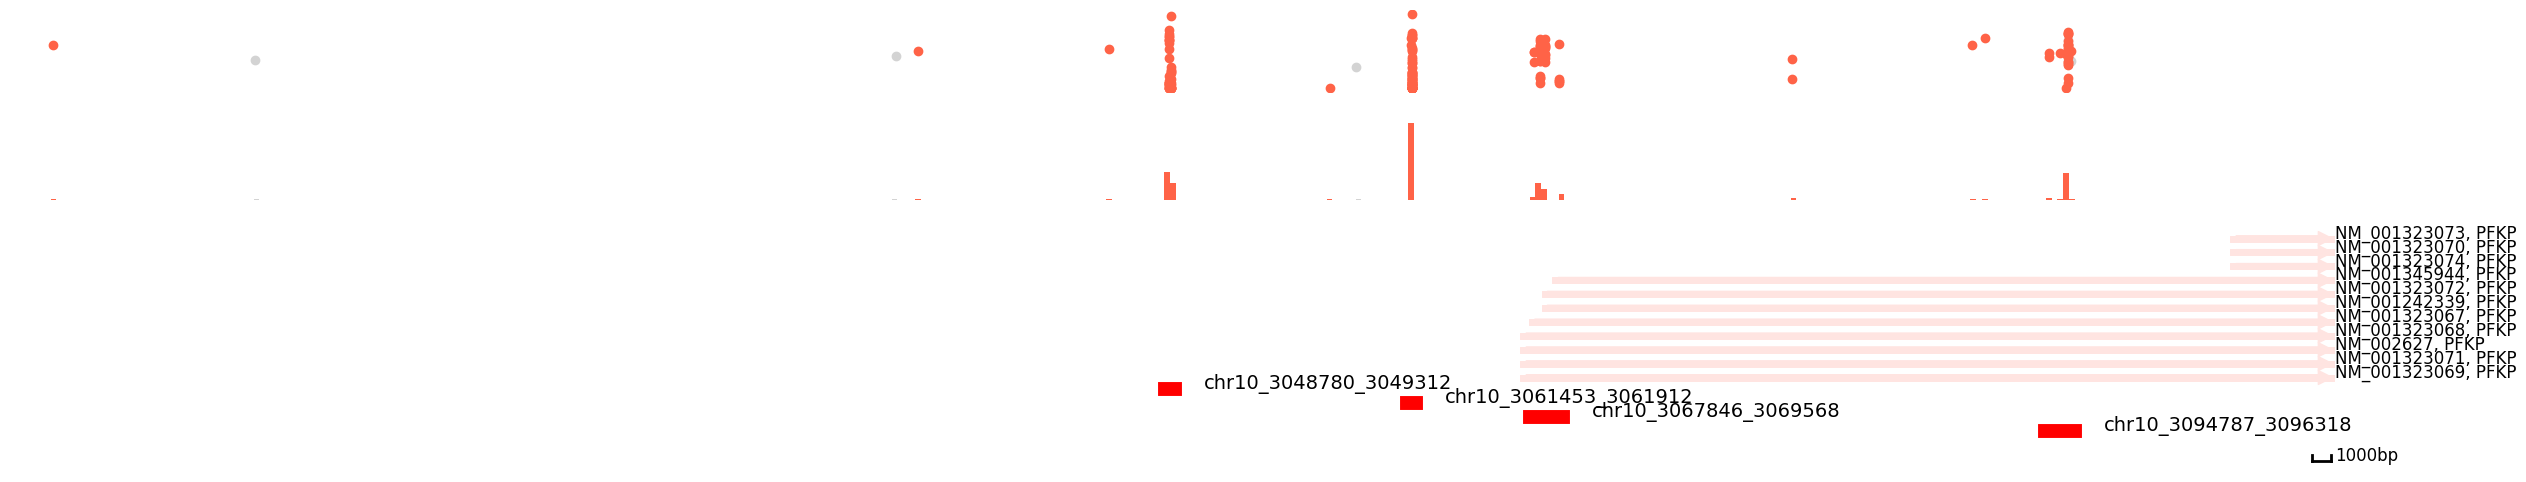

In [13]:
cc.pl.draw_area("chr10",3048452,3049913,60000,peak_data_K562,K562_SP1, "hg38", K562_brd4 ,
                figsize = (30,6),peak_line = 4,save = False,bins =400, plotsize = [1,1,3], example_length = 1000)

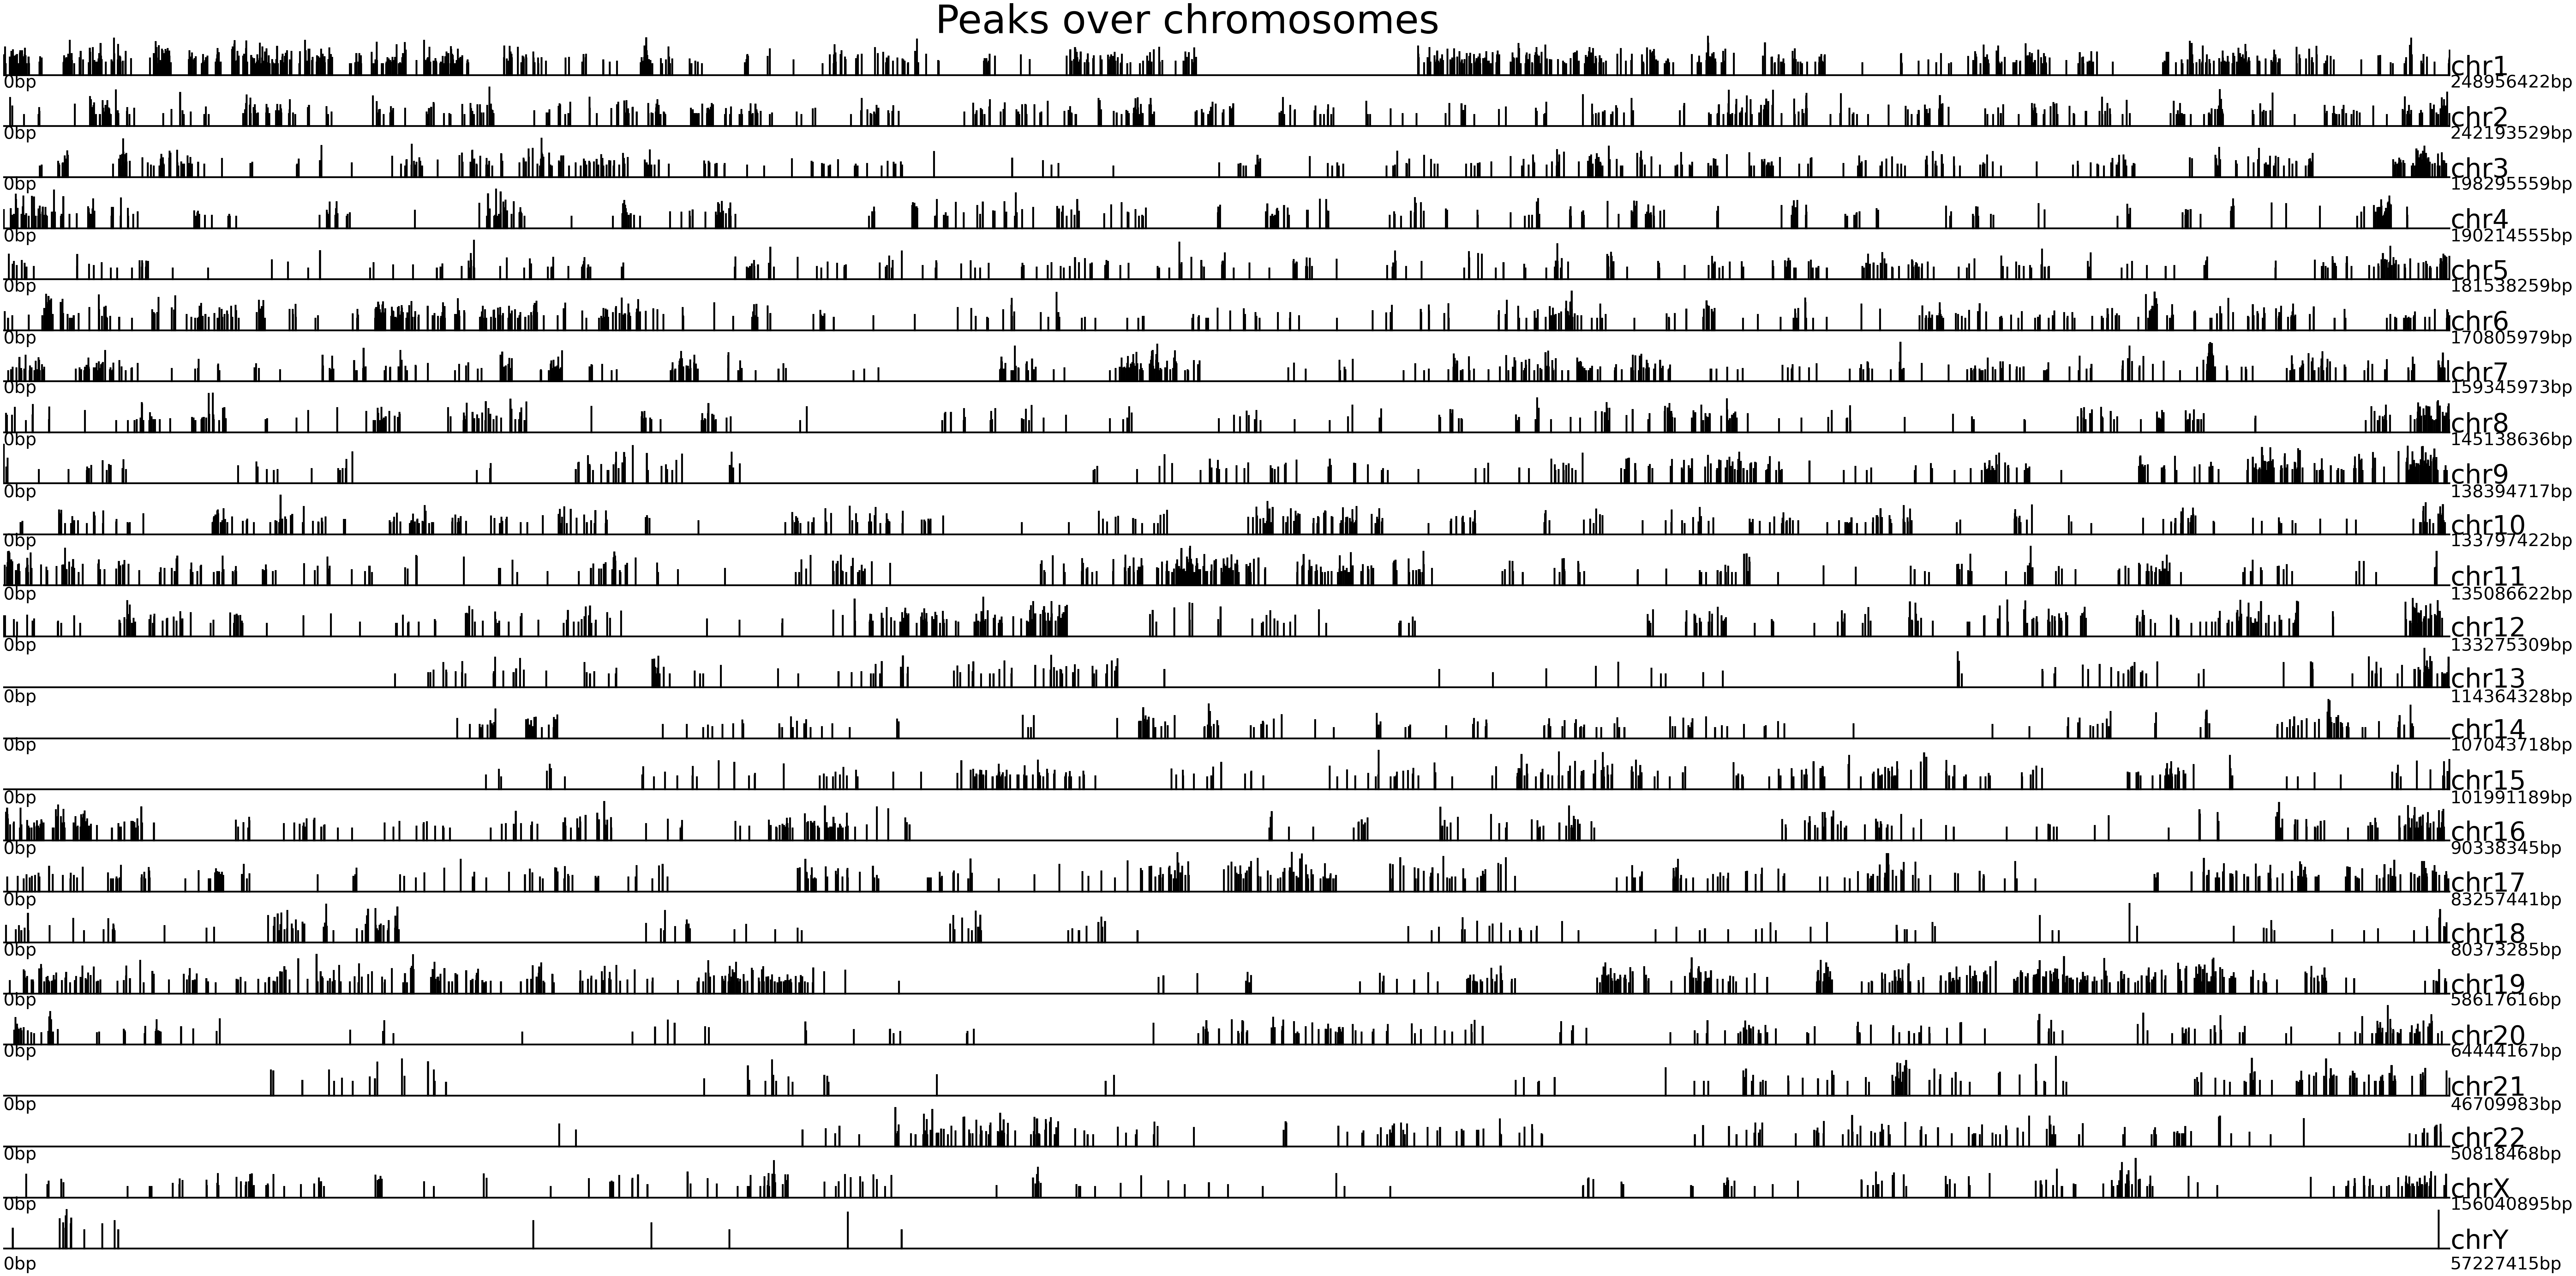

In [14]:
cc.pl.whole_peaks(peak_data_K562, reference = "hg38")

We could see that SP1 binds much more frequently in K562 than HCT116.

We could then check with reference Chip-seq data of SP1 in K562 from [ENCSR372IML](https://www.encodeproject.org/experiments/ENCSR372IML/) (and use the bigWig file [ENCFF588UII](https://www.encodeproject.org/files/ENCFF588UII/) generated by it）.

Down load the data if needed:

``` Python
    !wget https://www.encodeproject.org/files/ENCFF588UII/@@download/
```

In [15]:
mtx_K562 = cc.pl.calculate_signal(peak_data_K562, chipseq_signal = "ENCFF588UII.bigWig")

100%|██████████| 9876/9876 [01:26<00:00, 114.35it/s]


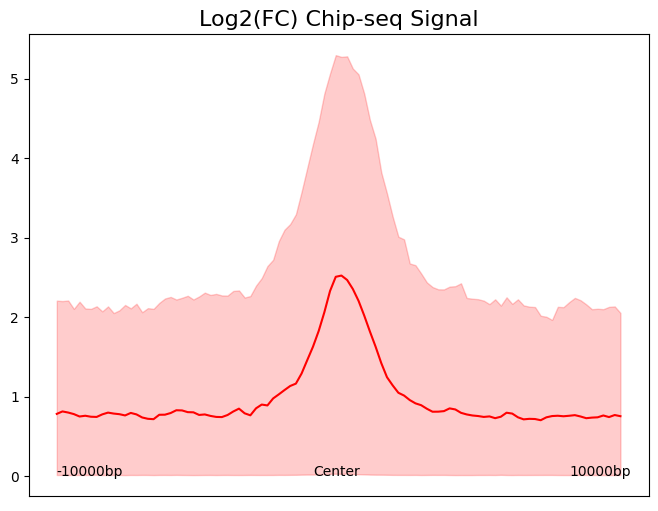

In [16]:
cc.pl.signal_plot(mtx_K562, alpha = 0.05)

/scratch/rmlab/rmlab_shared/juanru/pycallingcards/pycallingcards/plotting/_Chipseq.py:209: RuntimeWarning: Mean of empty slice
  cf = axis.pcolormesh(np.log2(signalmtx[np.argsort(np.nanmean(signalmtx,axis = 1)),:]+1),cmap = colormap)


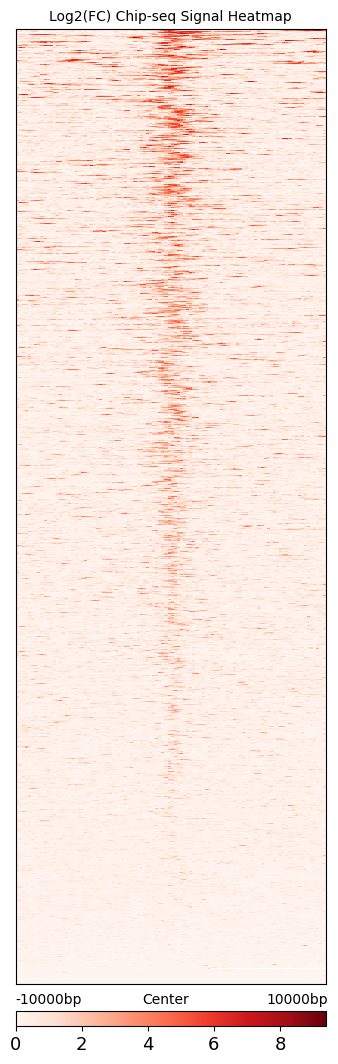

In [17]:
cc.pl.signal_heatmap(mtx_K562,pad =  0.023, belowlength = 100)

We could see that calling cards peaks are consistent with Chip-seq data. Peak centers tend to have higher signal and the sigmal goes lower as the distance get larger.

Because we call peaks for two data separately, we need to combine two peaks together using [bedtools](https://bedtools.readthedocs.io/en/latest/) and [pybedtools](https://daler.github.io/pybedtools/).

In [18]:
import pybedtools
peak = cc.rd.combine_ccf([peak_data_HCT116, peak_data_K562])
peak = pybedtools.BedTool.from_dataframe(peak).merge().to_dataframe() 
peak_data = peak.rename(columns={"chrom":"Chr", "start":"Start", "end":"End"})
peak_data 

,Chr,Start,End
0,chr1,29684,30087
1,chr1,36239,38107
2,chr1,198893,201208
3,chr1,203351,207161
4,chr1,265549,266336
...,...,...,...
10888,chrY,15158250,15158653
10889,chrY,16985442,16985845
10890,chrY,19753311,19753714
10891,chrY,21011133,21011828


Check for the peaks again.

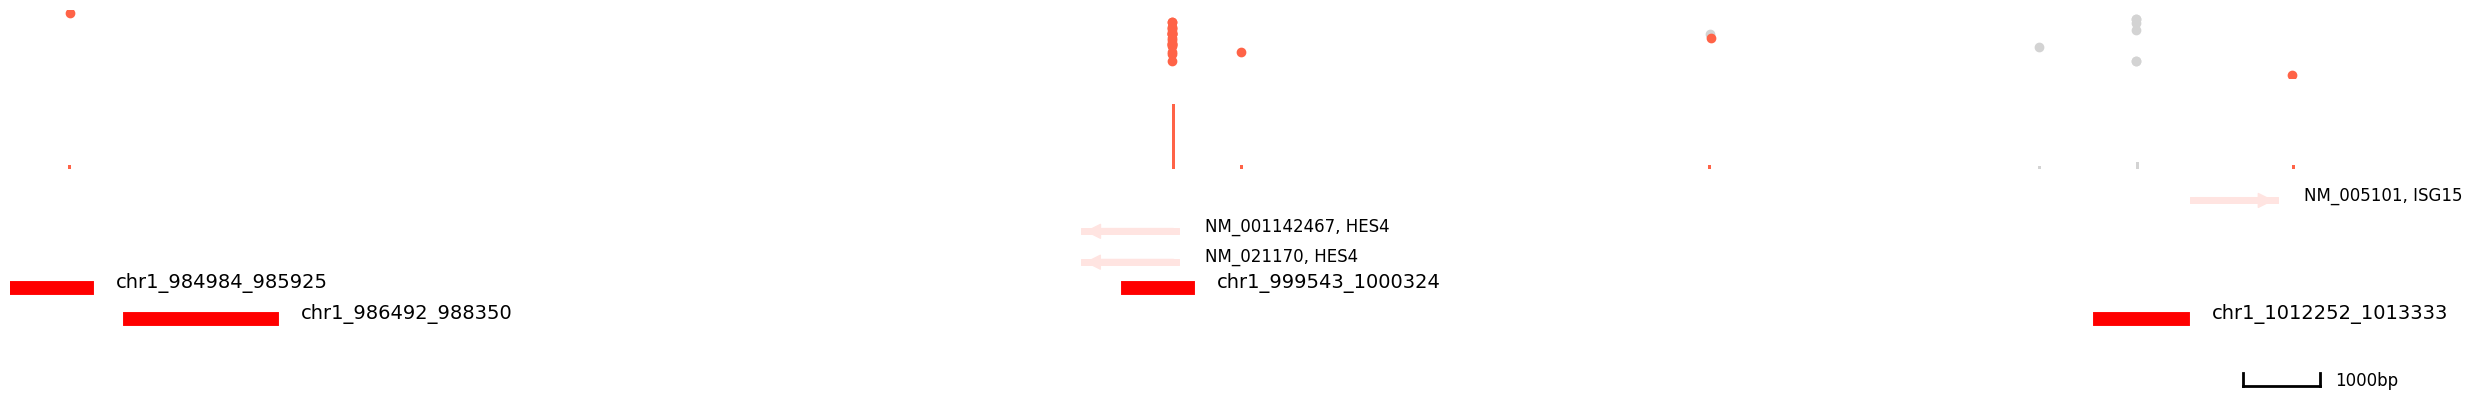

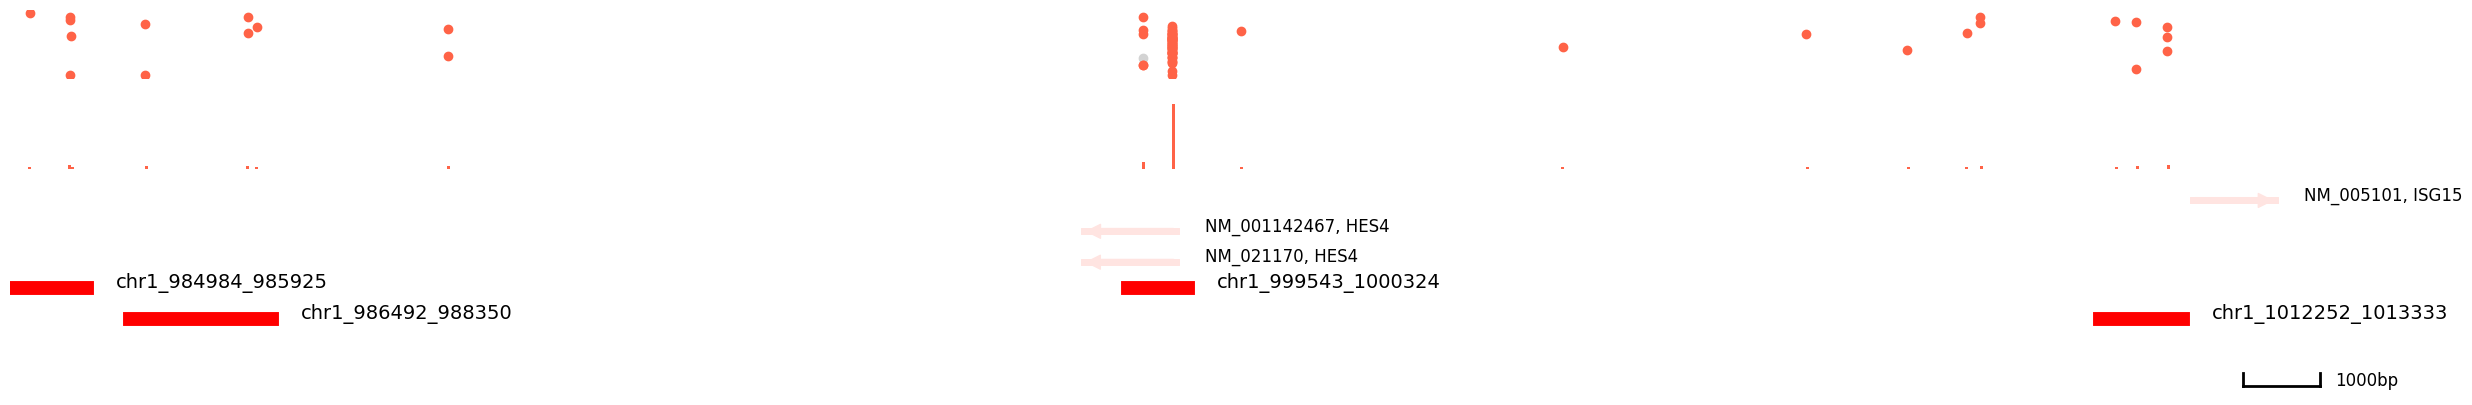

In [19]:
cc.pl.draw_area("chr1",999921,1000324,15000,peak_data, HCT116_SP1, "hg38", HCT116_brd4,
                figsize = (30,5),peak_line = 2,save = False,plotsize = [1,1,3],  example_length = 1000)
cc.pl.draw_area("chr1",999921,1000324,15000,peak_data, K562_SP1, "hg38", K562_brd4,
                figsize = (30,5),peak_line = 2,save = False,plotsize = [1,1,3],  example_length = 1000)

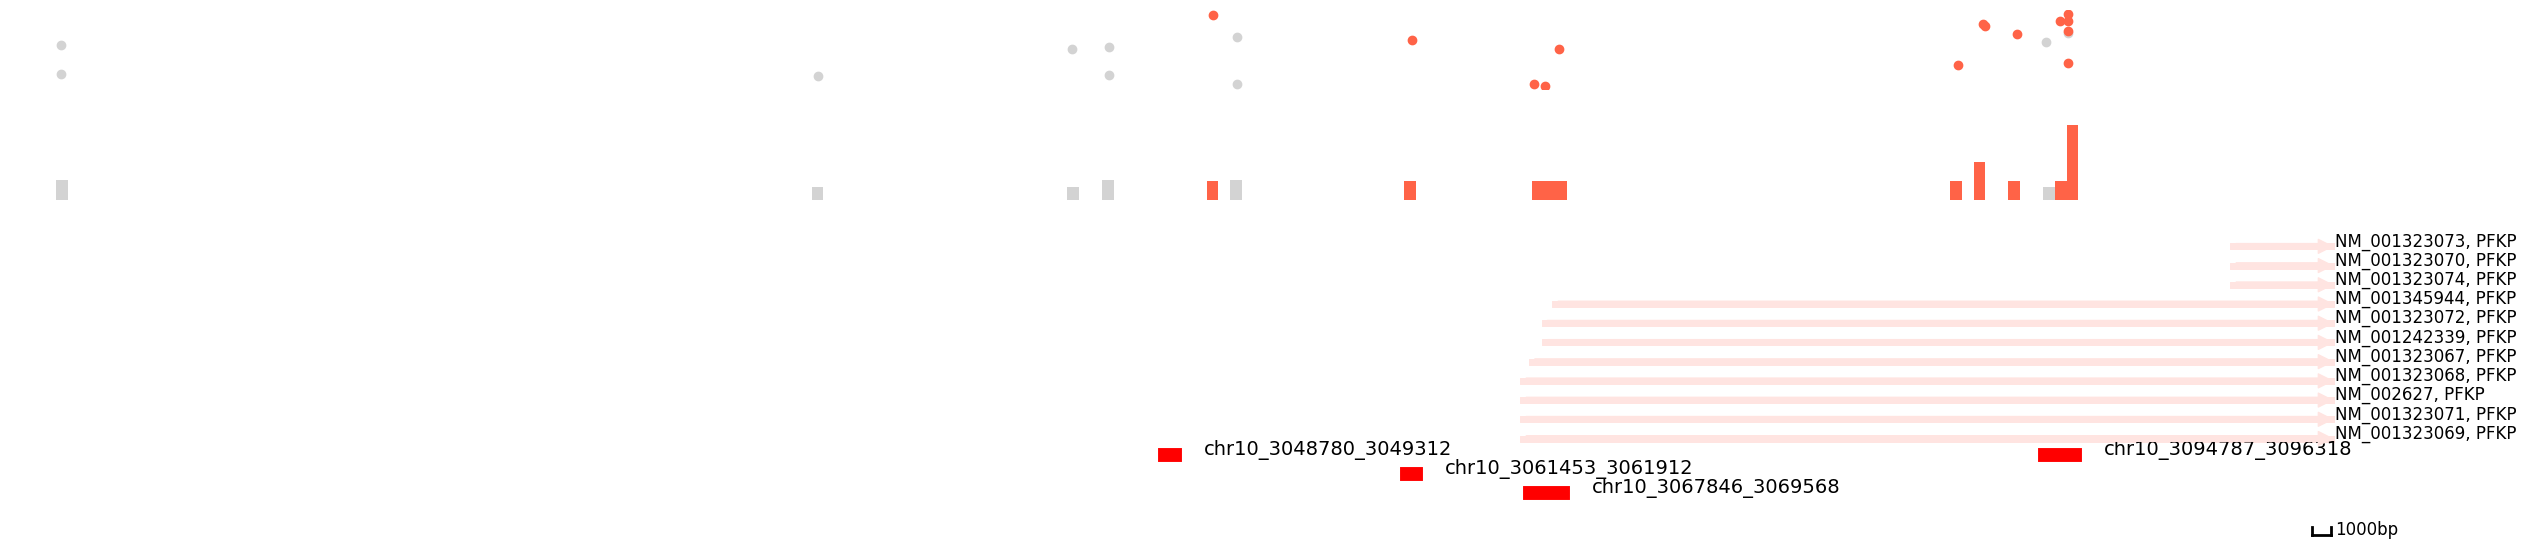

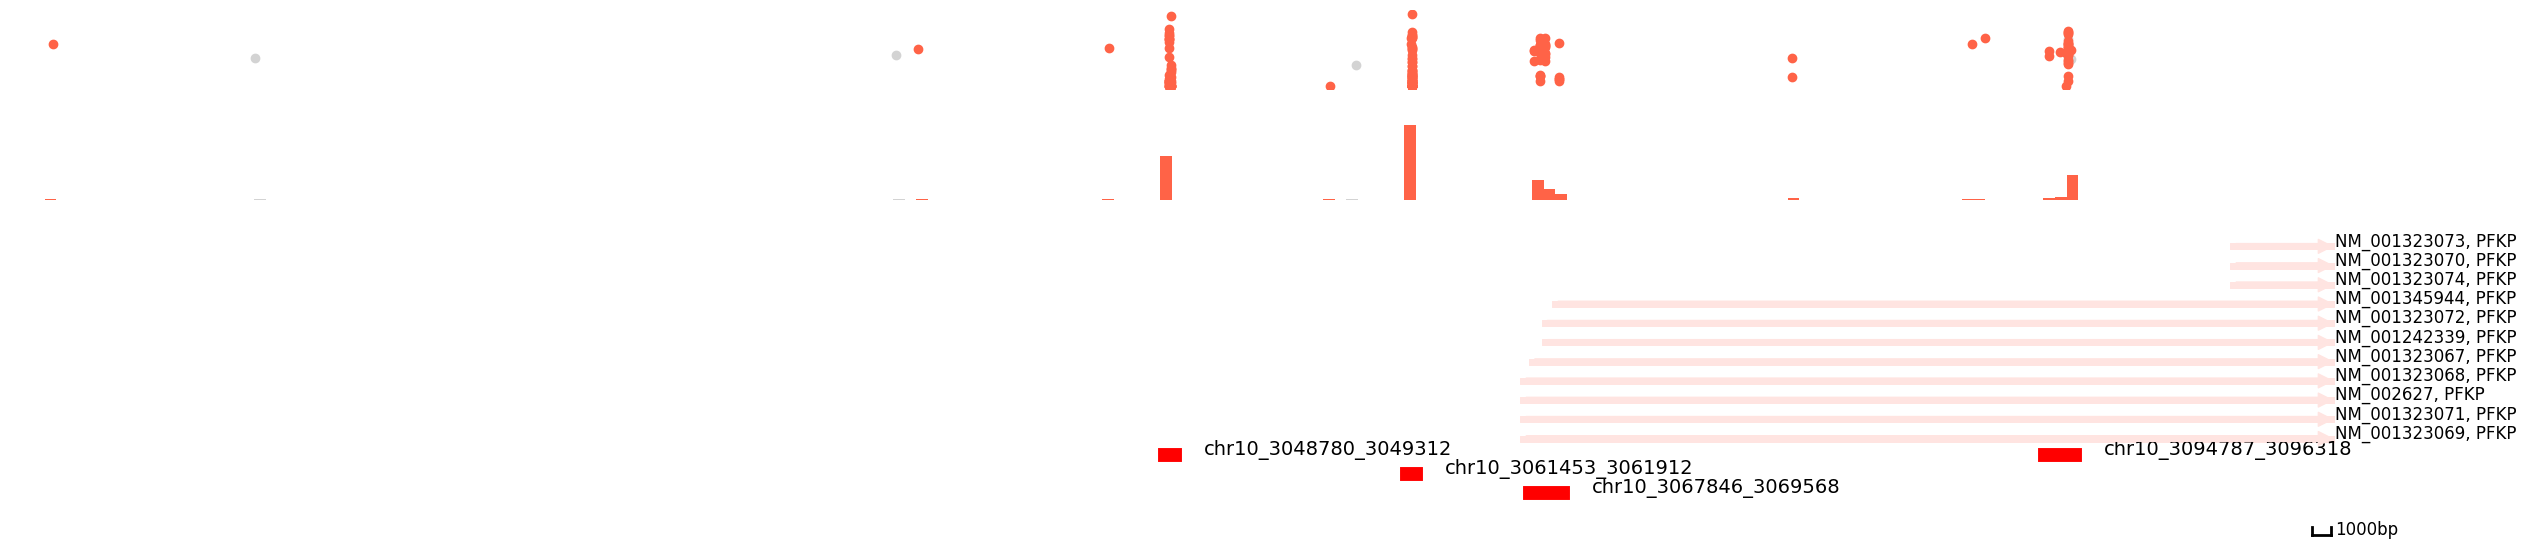

In [20]:
cc.pl.draw_area("chr10",3048452,3049913,60000,peak_data, HCT116_SP1, "hg38", HCT116_brd4,
                figsize = (30,7),peak_line = 3,save = False, bins = 200, plotsize = [1,1,4], example_length = 1000)
cc.pl.draw_area("chr10",3048452,3049913,60000,peak_data, K562_SP1, "hg38", K562_brd4,
                figsize = (30,7),peak_line = 3,save = False, bins = 200, plotsize = [1,1,4],  example_length = 1000)

Results seem to be good! Congratulations! Find out the closest genes for each peak for annotation.

In [21]:
peak_annotation = cc.pp.annotation(peak_data, reference = "hg38")
peak_annotation = cc.pp.combine_annotation(peak_data,peak_annotation)
peak_annotation

In the bedtools method, we would use bedtools in the default path. Set bedtools path by 'bedtools_path' if needed.


,Chr,Start,End,Nearest Refseq1,Gene Name1,Nearest Refseq2,Gene Name2
0,chr1,29684,30087,NR_036051,MIR1302-2,NR_024540,WASH7P
1,chr1,36239,38107,NR_026818,FAM138A,NR_036051,MIR1302-2
2,chr1,198893,201208,NR_026823,FAM138D,NR_107063,MIR6859-3
3,chr1,203351,207161,NR_026823,FAM138D,NR_107063,MIR6859-3
4,chr1,265549,266336,NR_026823,FAM138D,NR_107063,MIR6859-3
...,...,...,...,...,...,...,...
10888,chrY,15158250,15158653,NM_001206850,NLGN4Y,NR_046504,NLGN4Y-AS1
10889,chrY,16985442,16985845,NR_028083,FAM41AY1,NR_002160,FAM224B
10890,chrY,19753311,19753714,NM_001146706,KDM5D,NR_045128,TXLNGY
10891,chrY,21011133,21011828,NM_001039567,RPS4Y2,NM_001282471,PRORY


Combine the two experiment ccf files to make anndata object.

In [22]:
exp_ccf = pd.concat([K562_SP1,HCT116_SP1])
exp_ccf

,Chr,Start,End,Reads,Direction,Barcodes
0,chr1,16529,16533,163,-,GCTCCTAAGTACGTTC-1
1,chr1,29884,29888,10,+,CTCACACCAGACGCTC-1
2,chr1,29884,29888,155,+,TGGCCAGCACCCATTC-1
3,chr1,29884,29888,285,+,GTGGGTCCACGGCCAT-1
4,chr1,29884,29888,7,+,CGTCTACTCAACACGT-1
...,...,...,...,...,...,...
77205,chrY,25518788,25518792,2,+,TGGGCGTTCGAACGGA-1
77206,chrY,56987633,56987637,13,+,CAGTCCTAGGCACATG-1
77207,chrY,57080855,57080859,17,+,CGGAGCTCATCGACGC-1
77208,chrY,57080855,57080859,7,+,GTAACGTAGTTACGGG-1


Read the barocede file.

In [23]:
barcodes = cc.datasets.SP1_K562HCT116_data(data = "barcodes")
barcodes = barcodes.drop_duplicates(subset=['Index'])
barcodes

,Index,cluster
0,AAACCTGAGAAAGTGG-1,HCT116
1,AAACCTGAGACCGGAT-1,K562
2,AAACCTGAGACTAGAT-1,HCT116
3,AAACCTGAGAGCTTCT-1,HCT116
4,AAACCTGAGAGTACCG-1,HCT116
...,...,...
52206,TTTGTCATCTCCGGTT-1,K562
52207,TTTGTCATCTCGATGA-1,K562
52208,TTTGTCATCTCTAAGG-1,K562
52209,TTTGTCATCTGGAGCC-1,HCT116


Use ccf data, peak data and barcodes data to make a cell by peak anndata object.

In [24]:
adata_ccf = cc.pp.makeAnndata(exp_ccf, peak_annotation, barcodes)
adata_ccf

100%|██████████| 24/24 [00:03<00:00,  6.68it/s]


AnnData object with n_obs × n_vars = 51079 × 10893
    obs: 'cluster'
    var: 'Chr', 'Start', 'End', 'Nearest Refseq1', 'Gene Name1', 'Nearest Refseq2', 'Gene Name2'

Although one peak should have many insertions, but there is a chance that all the cells from the peak was filtered by the RNA preprocesssing. In this case, we advice to filter the peaks. Additioanlly we also filter cells has very few insertions.

In [25]:
cc.pp.filter_peaks(adata_ccf, min_counts=5)
cc.pp.filter_peaks(adata_ccf, min_cells=5)
adata_ccf

AnnData object with n_obs × n_vars = 51079 × 10887
    obs: 'cluster'
    var: 'Chr', 'Start', 'End', 'Nearest Refseq1', 'Gene Name1', 'Nearest Refseq2', 'Gene Name2', 'n_counts', 'n_cells'

Differential peak analysis would find out the significant binding for each group. In this example, we use *fisher exact test* to find out.

In [26]:
cc.tl.rank_peak_groups(adata_ccf,"cluster",method = 'fisher_exact',key_added = 'fisher_exact')

100%|██████████| 2/2 [03:00<00:00, 90.26s/it]


Plot the results for differential peak analysis.

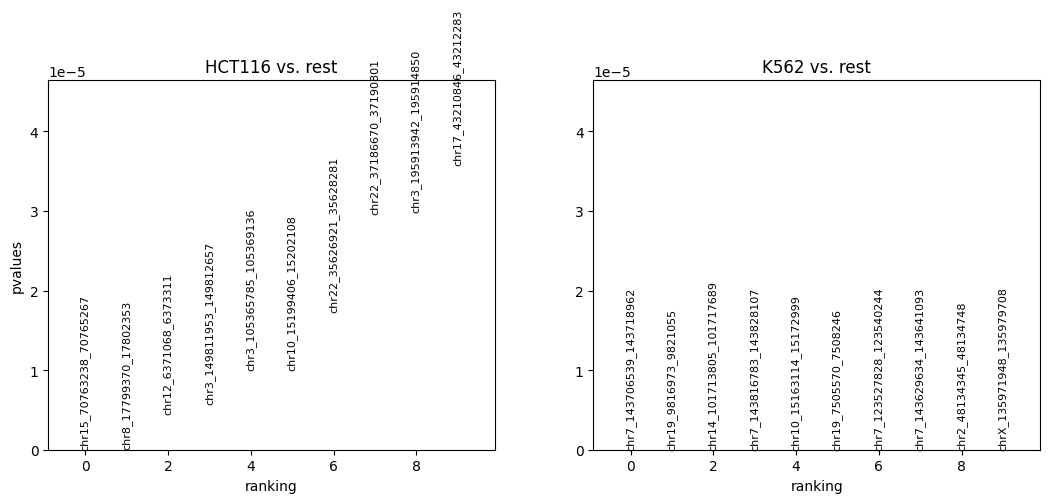

In [27]:
cc.pl.rank_peak_groups(adata_ccf, key = 'fisher_exact')

Then, we take a look at the genome for highly differentiated peaks. The colored ones are the insertions for specific cluster and the grey ones are the backgound insertion information. We could see some huge difference between SP1 bindings in HCT116 and SP1 bindings in K562.

In [28]:
bg_ccf = pd.concat([K562_brd4,HCT116_brd4])
bg_ccf

,Chr,Start,End,Reads,Direction,Barcodes
0,chr1,30238,30242,3,+,TTTACTGCATAAAGGT-1
1,chr1,30355,30359,2,-,ATCACGAAGAGTAATC-1
2,chr1,30355,30359,70,+,TTGAACGCAAATCCGT-1
3,chr1,31101,31105,2,+,CCTCAGTCATCAGTAC-1
4,chr1,32116,32120,5,+,CTAGTGAAGACAAAGG-1
...,...,...,...,...,...,...
37769,chrY,18037315,18037319,9,-,GCAGTTAAGATCTGAA-1
37770,chrY,24036504,24036508,168,+,GCAGTTAAGATCTGAA-1
37771,chrY,24036504,24036508,508,+,CATATGGCAGCCAGAA-1
37772,chrY,25633622,25633626,13,-,GCAGTTAAGATCTGAA-1


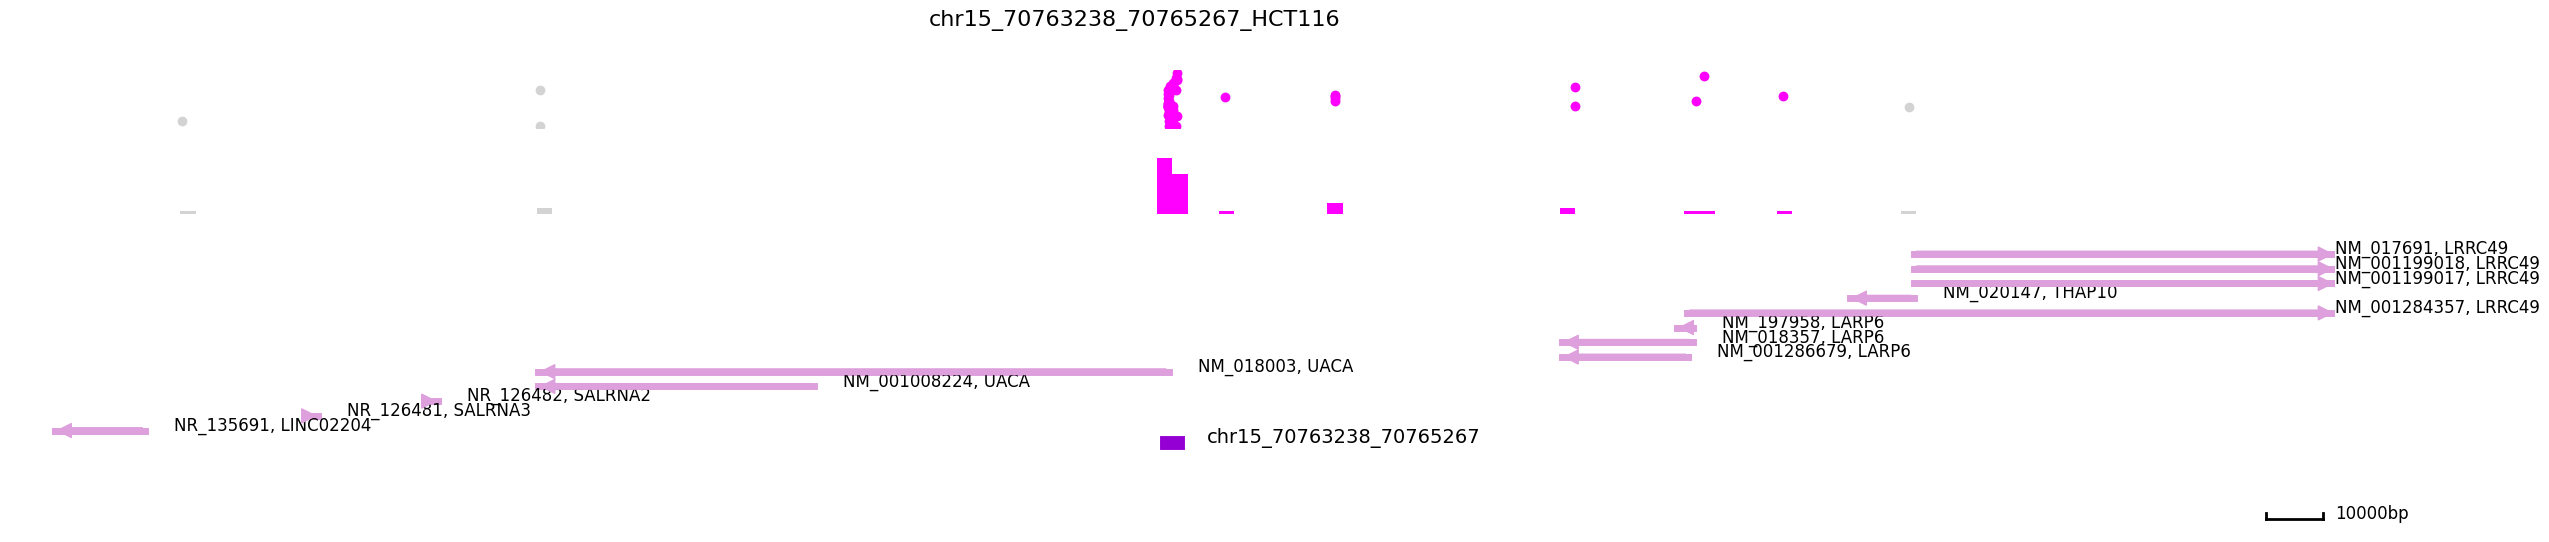

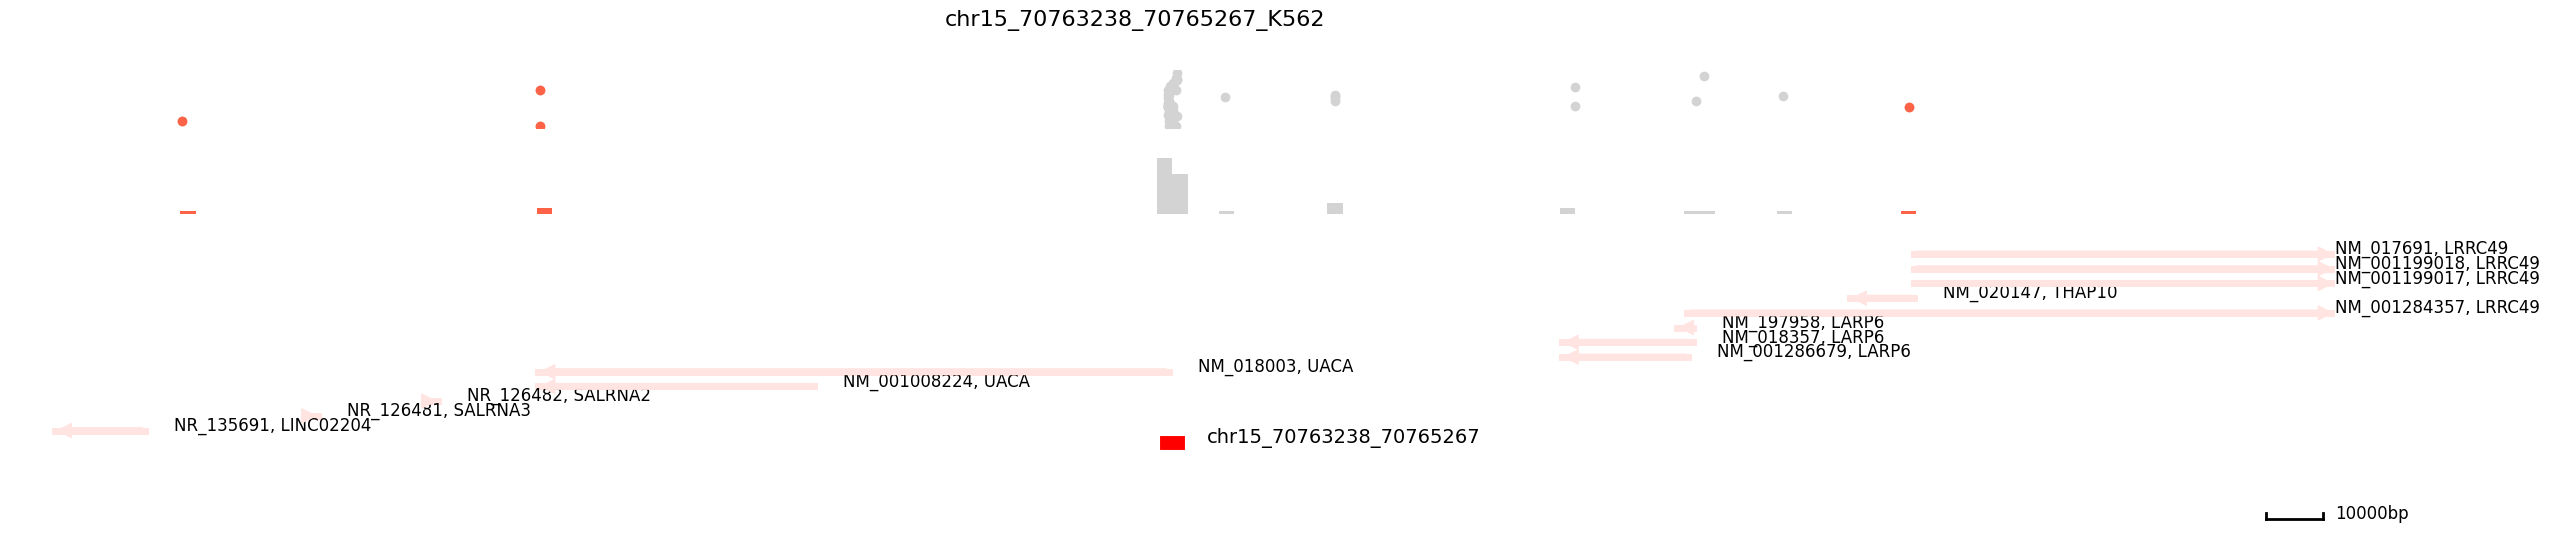

In [29]:
cc.pl.draw_area("chr15",70763238,70765267,200000,peak_data,exp_ccf,"hg38",adata = adata_ccf,  bins = 150,
                name = "HCT116",key ='cluster',figsize = (30,6),peak_line = 4,color = "purple", plotsize = [1,1,5], title = "chr15_70763238_70765267_HCT116")
cc.pl.draw_area("chr15",70763238,70765267,200000,peak_data,exp_ccf,"hg38",adata = adata_ccf, bins = 150,
                name = "K562",key ='cluster',figsize = (30,6),peak_line = 4,color = "red", plotsize = [1,1,5], title = "chr15_70763238_70765267_K562")

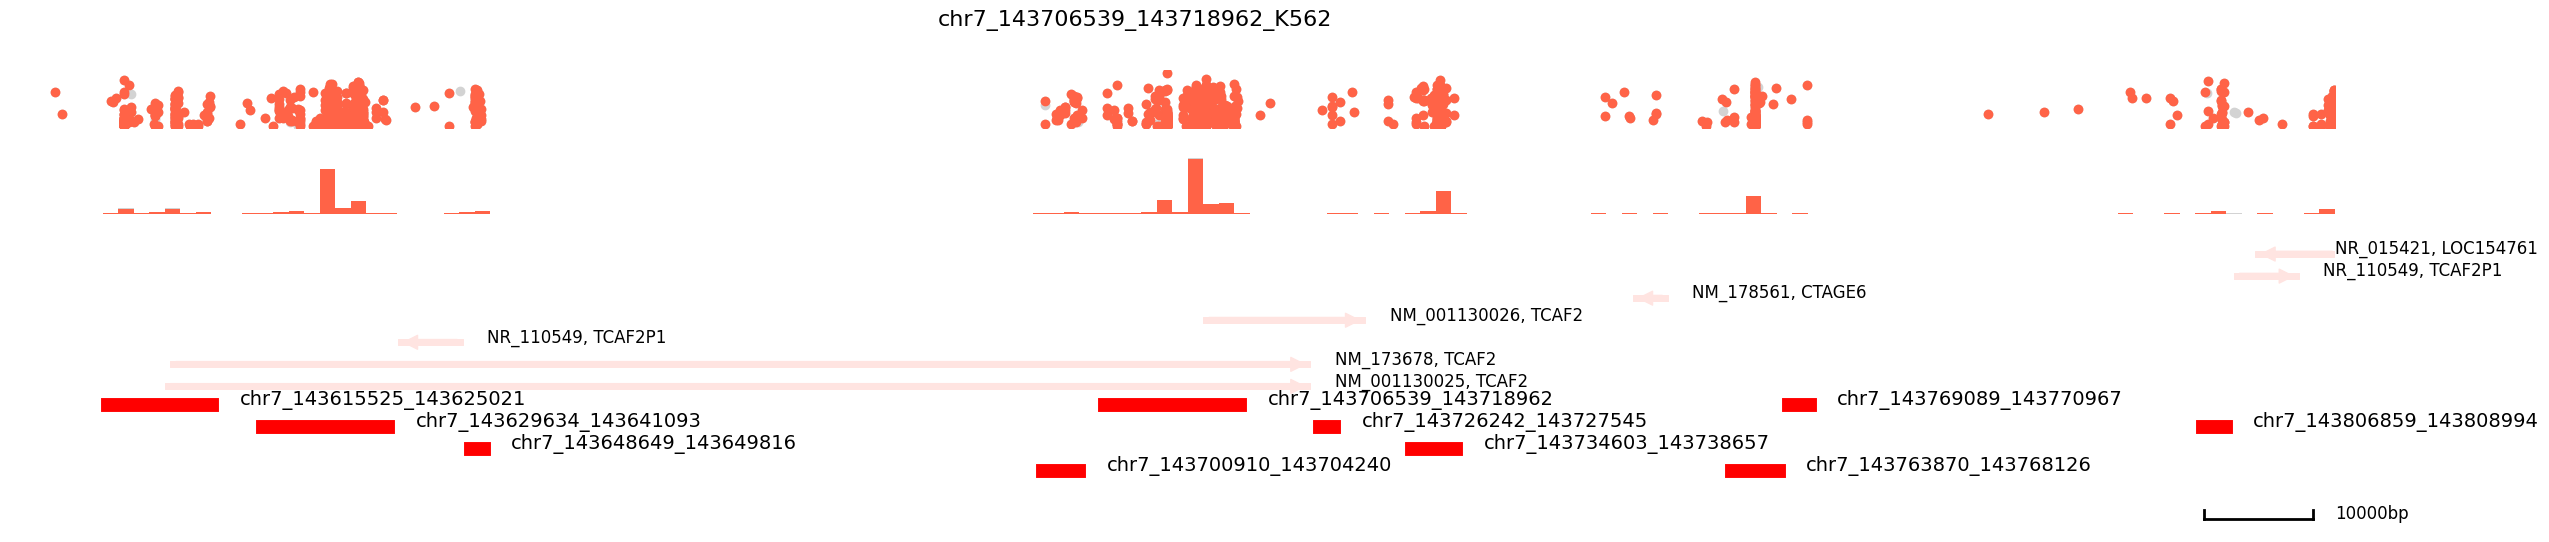

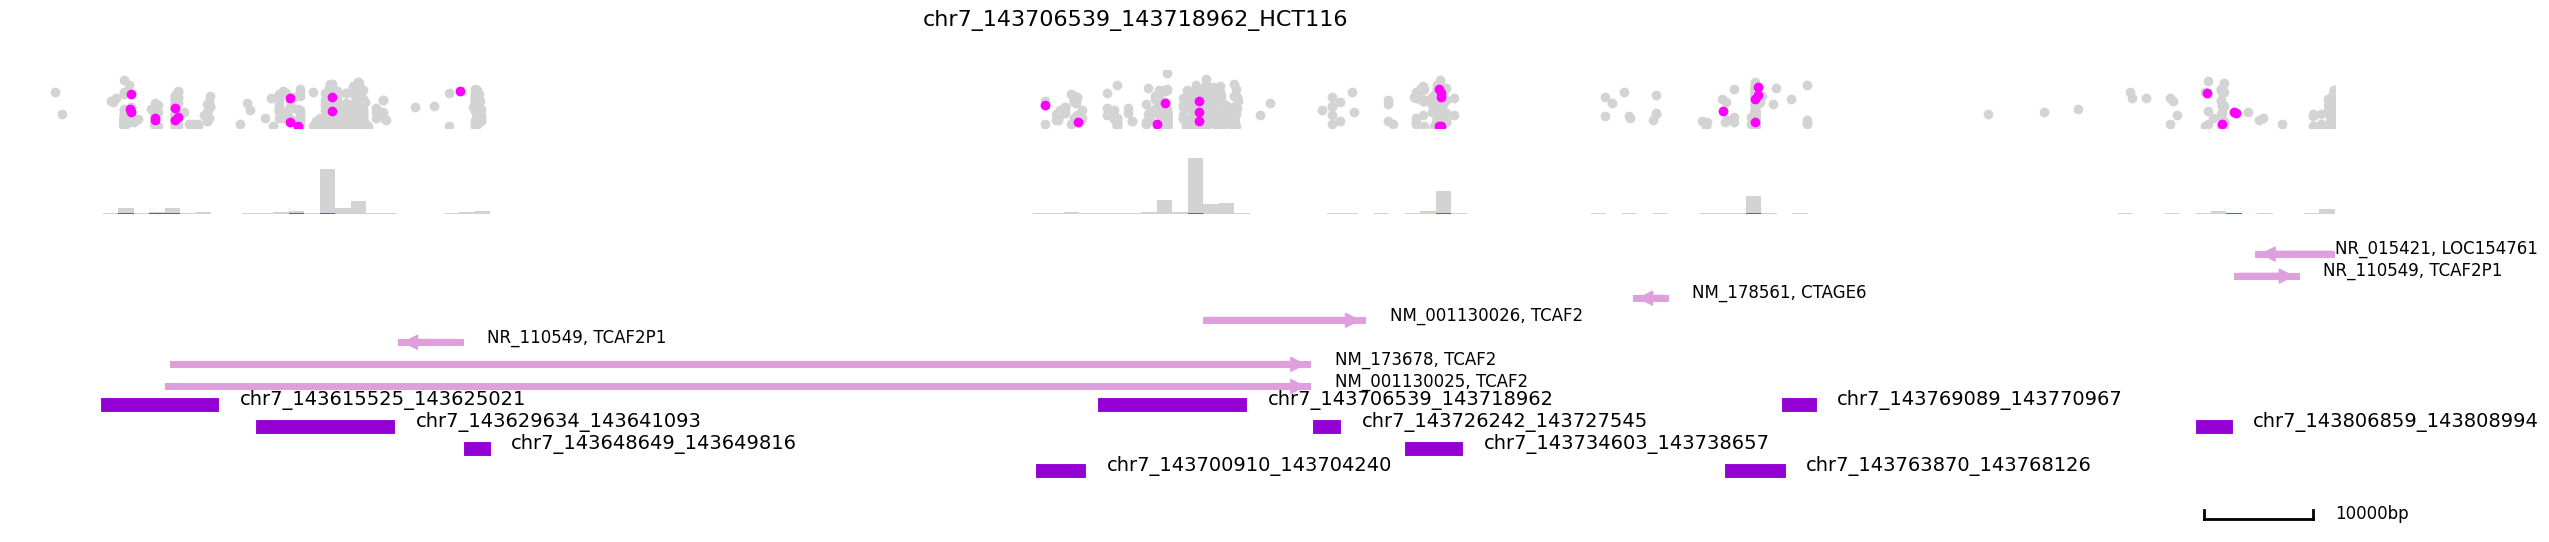

In [30]:
cc.pl.draw_area("chr7",143706539,143718962,100000,peak_data,exp_ccf,"hg38",adata = adata_ccf, bins = 150,
                name = "K562",key ='cluster',figsize = (30,6),peak_line = 4,color = "red", plotsize = [1,1,5], title = "chr7_143706539_143718962_K562")
cc.pl.draw_area("chr7",143706539,143718962,100000,peak_data,exp_ccf,"hg38",adata = adata_ccf,  bins = 150,
                name = "HCT116",key ='cluster',figsize = (30,6),peak_line = 4,color = "purple", plotsize = [1,1,5], title = "chr7_143706539_143718962_HCT116")

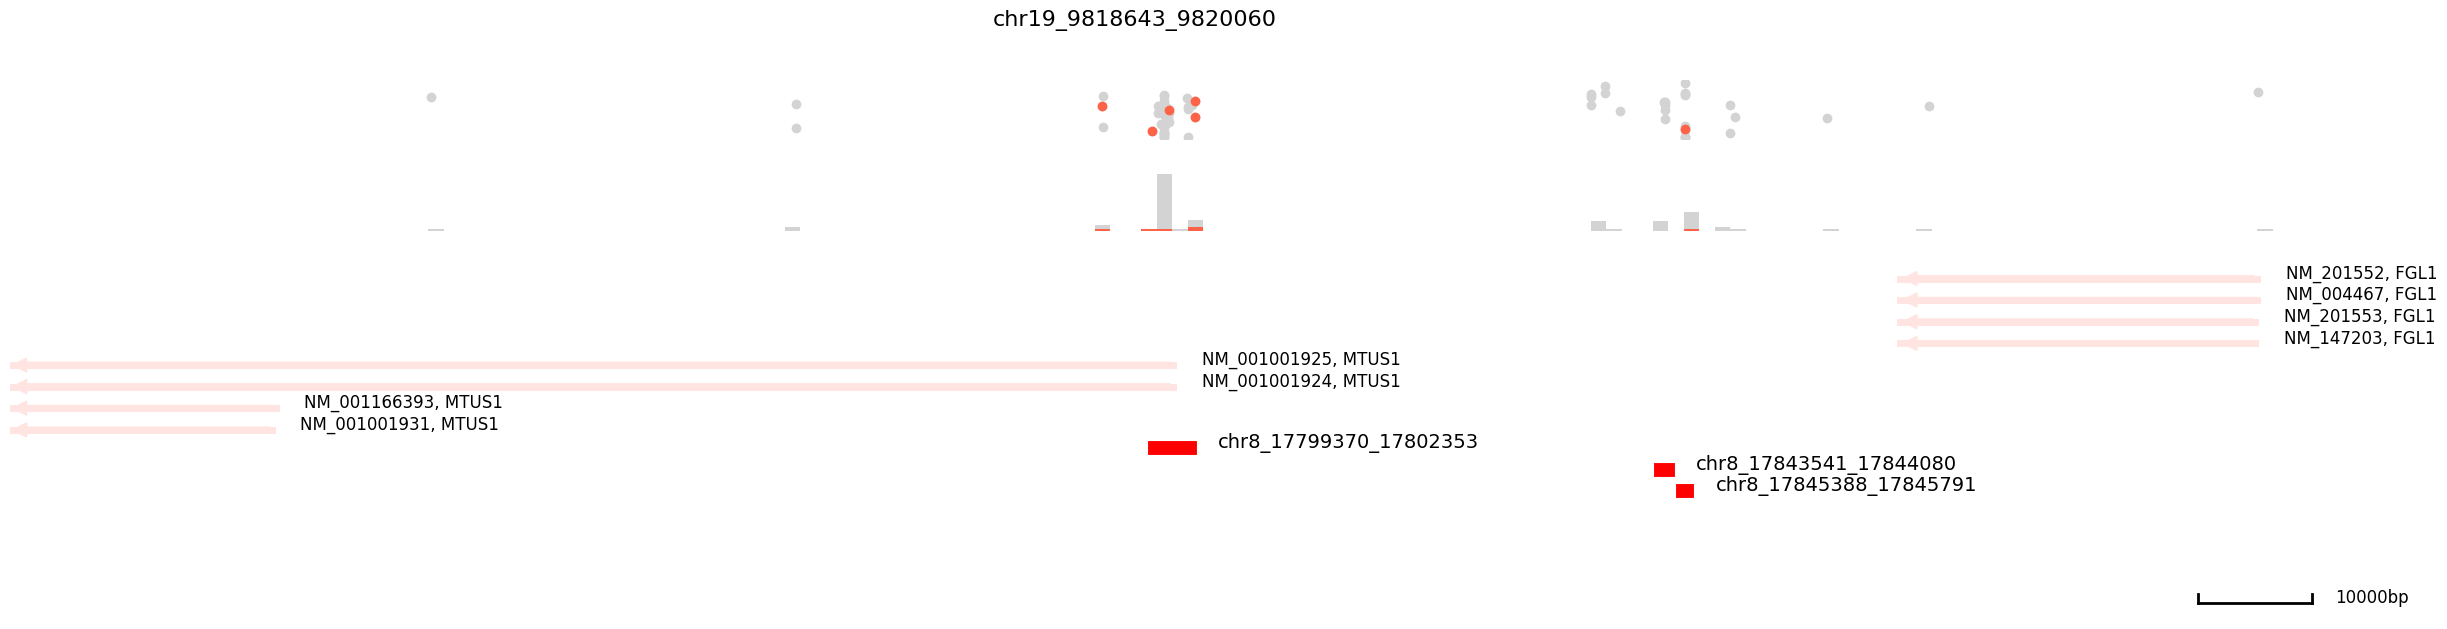

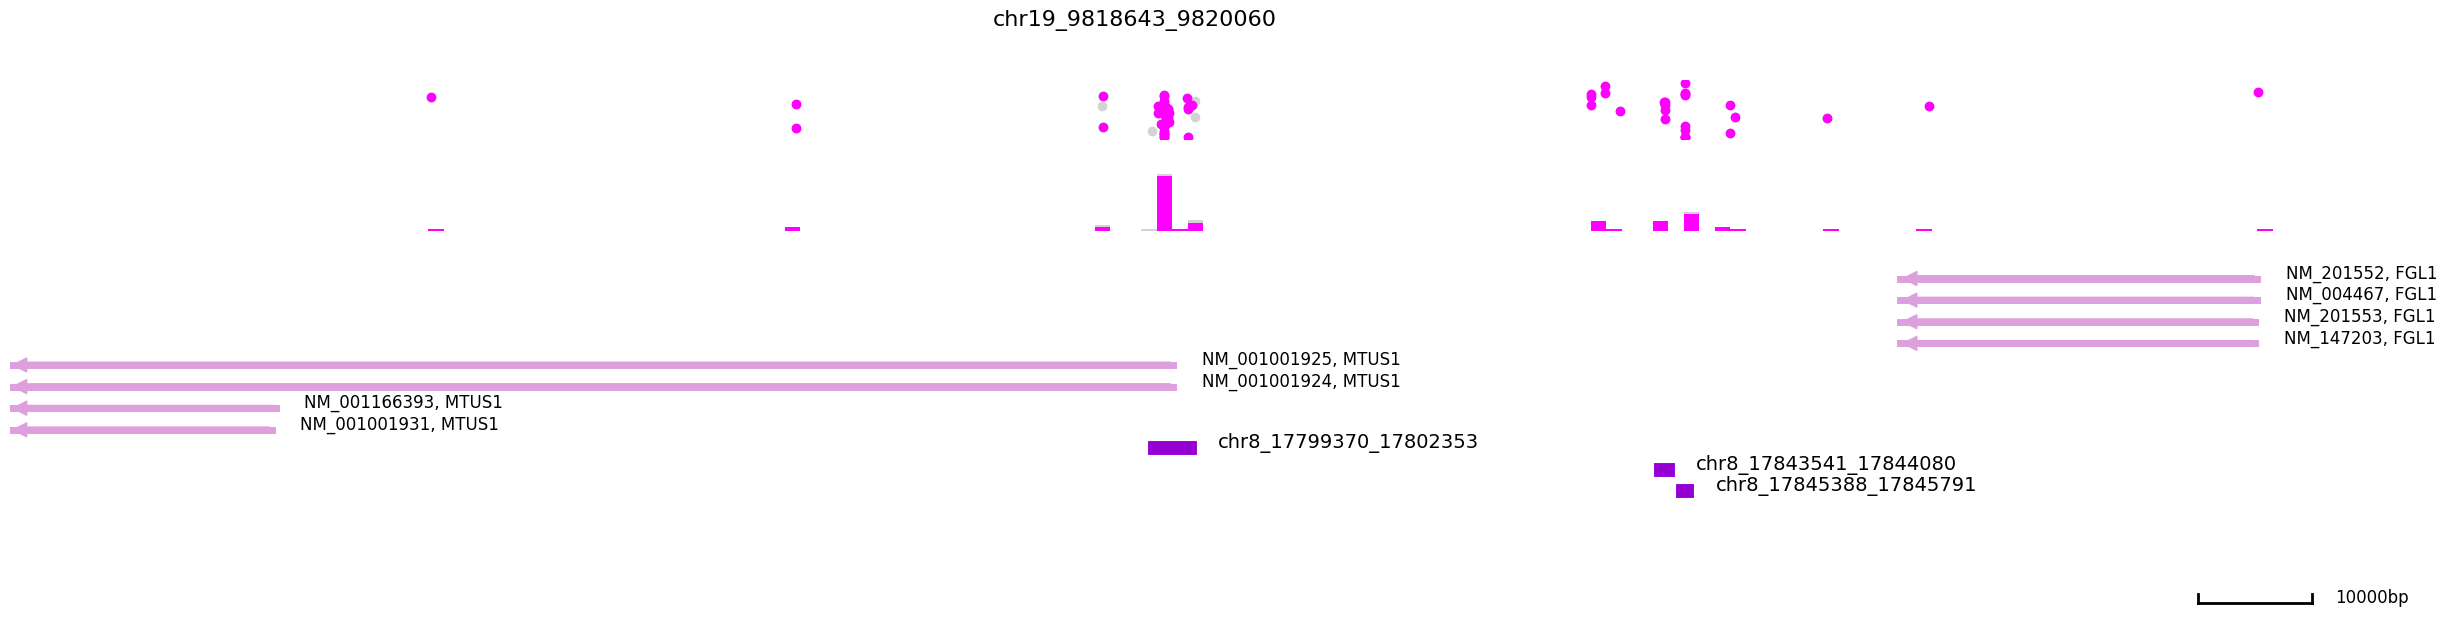

In [31]:
cc.pl.draw_area("chr8",17799370,17802353,100000,peak_data,exp_ccf,"hg38",adata = adata_ccf,  bins = 150,
                name = "K562",key ='cluster',figsize = (30,7),peak_line = 6,color = "red", plotsize = [1,1,6], title = "chr19_9818643_9820060")
cc.pl.draw_area("chr8",17799370,17802353,100000,peak_data,exp_ccf,"hg38",adata = adata_ccf,  bins = 150,
                name = "HCT116",key ='cluster',figsize = (30,7),peak_line = 6,color = "purple", plotsize = [1,1,6], title = "chr19_9818643_9820060")

Saved the file if needed.

In [32]:
adata_ccf.write("SP1_CCF.h5ad")